# OTAnalytics - Event processing, analysis and visualization

## Import packages

In [6]:
# Import libraries and modules
# General modules
from pathlib import Path

import numpy as np
import pandas as pd

# OTAnalytics modules
from OTAnalytics.plugin_prototypes.counter.event_counter import CountsProcessor
from OTAnalytics.plugin_prototypes.event_processor.event_processor import EventProcessor
from OTAnalytics.plugin_prototypes.zeitbedarf_calculator.zeitbedarf_calculator import ZeitbedarfsProcessor
from plugin_prototypes.speed_calculator.speed_calculator import SpeedProcessor

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set config variables

In [14]:
# Set env parameters and path
CONFIG= {
    "TIME_FORMAT": "%d.%m%.%y %H:%M Uhr",
    "FILTER_CLASS": ["car", "bus", "motorcycle", "truck", "delivery_van", "private_van", "truck_with_trailer", "truck_with_semitrailer"],
    "FILTER_SECTION": ["NORTH", "EAST", "SOUTH", "WEST"],
    "EVENTLIST_PATH": "events.json",
    "SECTIONSLIST_PATH": "data/sectionlist_SH.json.bz2",
    "FROM_TIME": "2023-03-28 07:00:00",
    "TO_TIME": "2023-03-28 08:00:00",
    "INTERVAL_LENGTH_MIN": 5, # in minutes
    "SIGNALPROG_PATH": "data/signal_program.csv",
    "SIGNALPROG_MAPPER_PATH": "data/signal_program_mapper.json",
    "ZB_CUTOFF": 3.5,
    "DIRECTION_NAMES":{
        "first_to_last_section": "in",
        "last_to_first_section": "out",
    }
}  

## Import Events

In [19]:
event_processor = EventProcessor(CONFIG)
events = event_processor.process_events()

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

## Create Count Table and Plot Counts

In [18]:
counts_processor = CountsProcessor(CONFIG, events)
counts_table = counts_processor.create_counting_table()
counts_processor.plot_counts()

## Create Flow Table and Plot Flows

/Users/michaelheilig/GIT/OTC/OTAnalytics/venv/lib/python3.10/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning:

invalid value encountered in divide

/Users/michaelheilig/GIT/OTC/OTAnalytics/venv/lib/python3.10/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning:

invalid value encountered in divide

/Users/michaelheilig/GIT/OTC/OTAnalytics/venv/lib/python3.10/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning:

invalid value encountered in divide

/Users/michaelheilig/GIT/OTC/OTAnalytics/venv/lib/python3.10/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning:

invalid value encountered in divide

/Users/michaelheilig/GIT/OTC/OTAnalytics/venv/lib/python3.10/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning:

invalid value encountered in divide

/Users/michaelheilig/GIT/OTC/OTAnalytics/venv/lib/python3.10/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning:

invalid value encountered in divide

/Users/mic

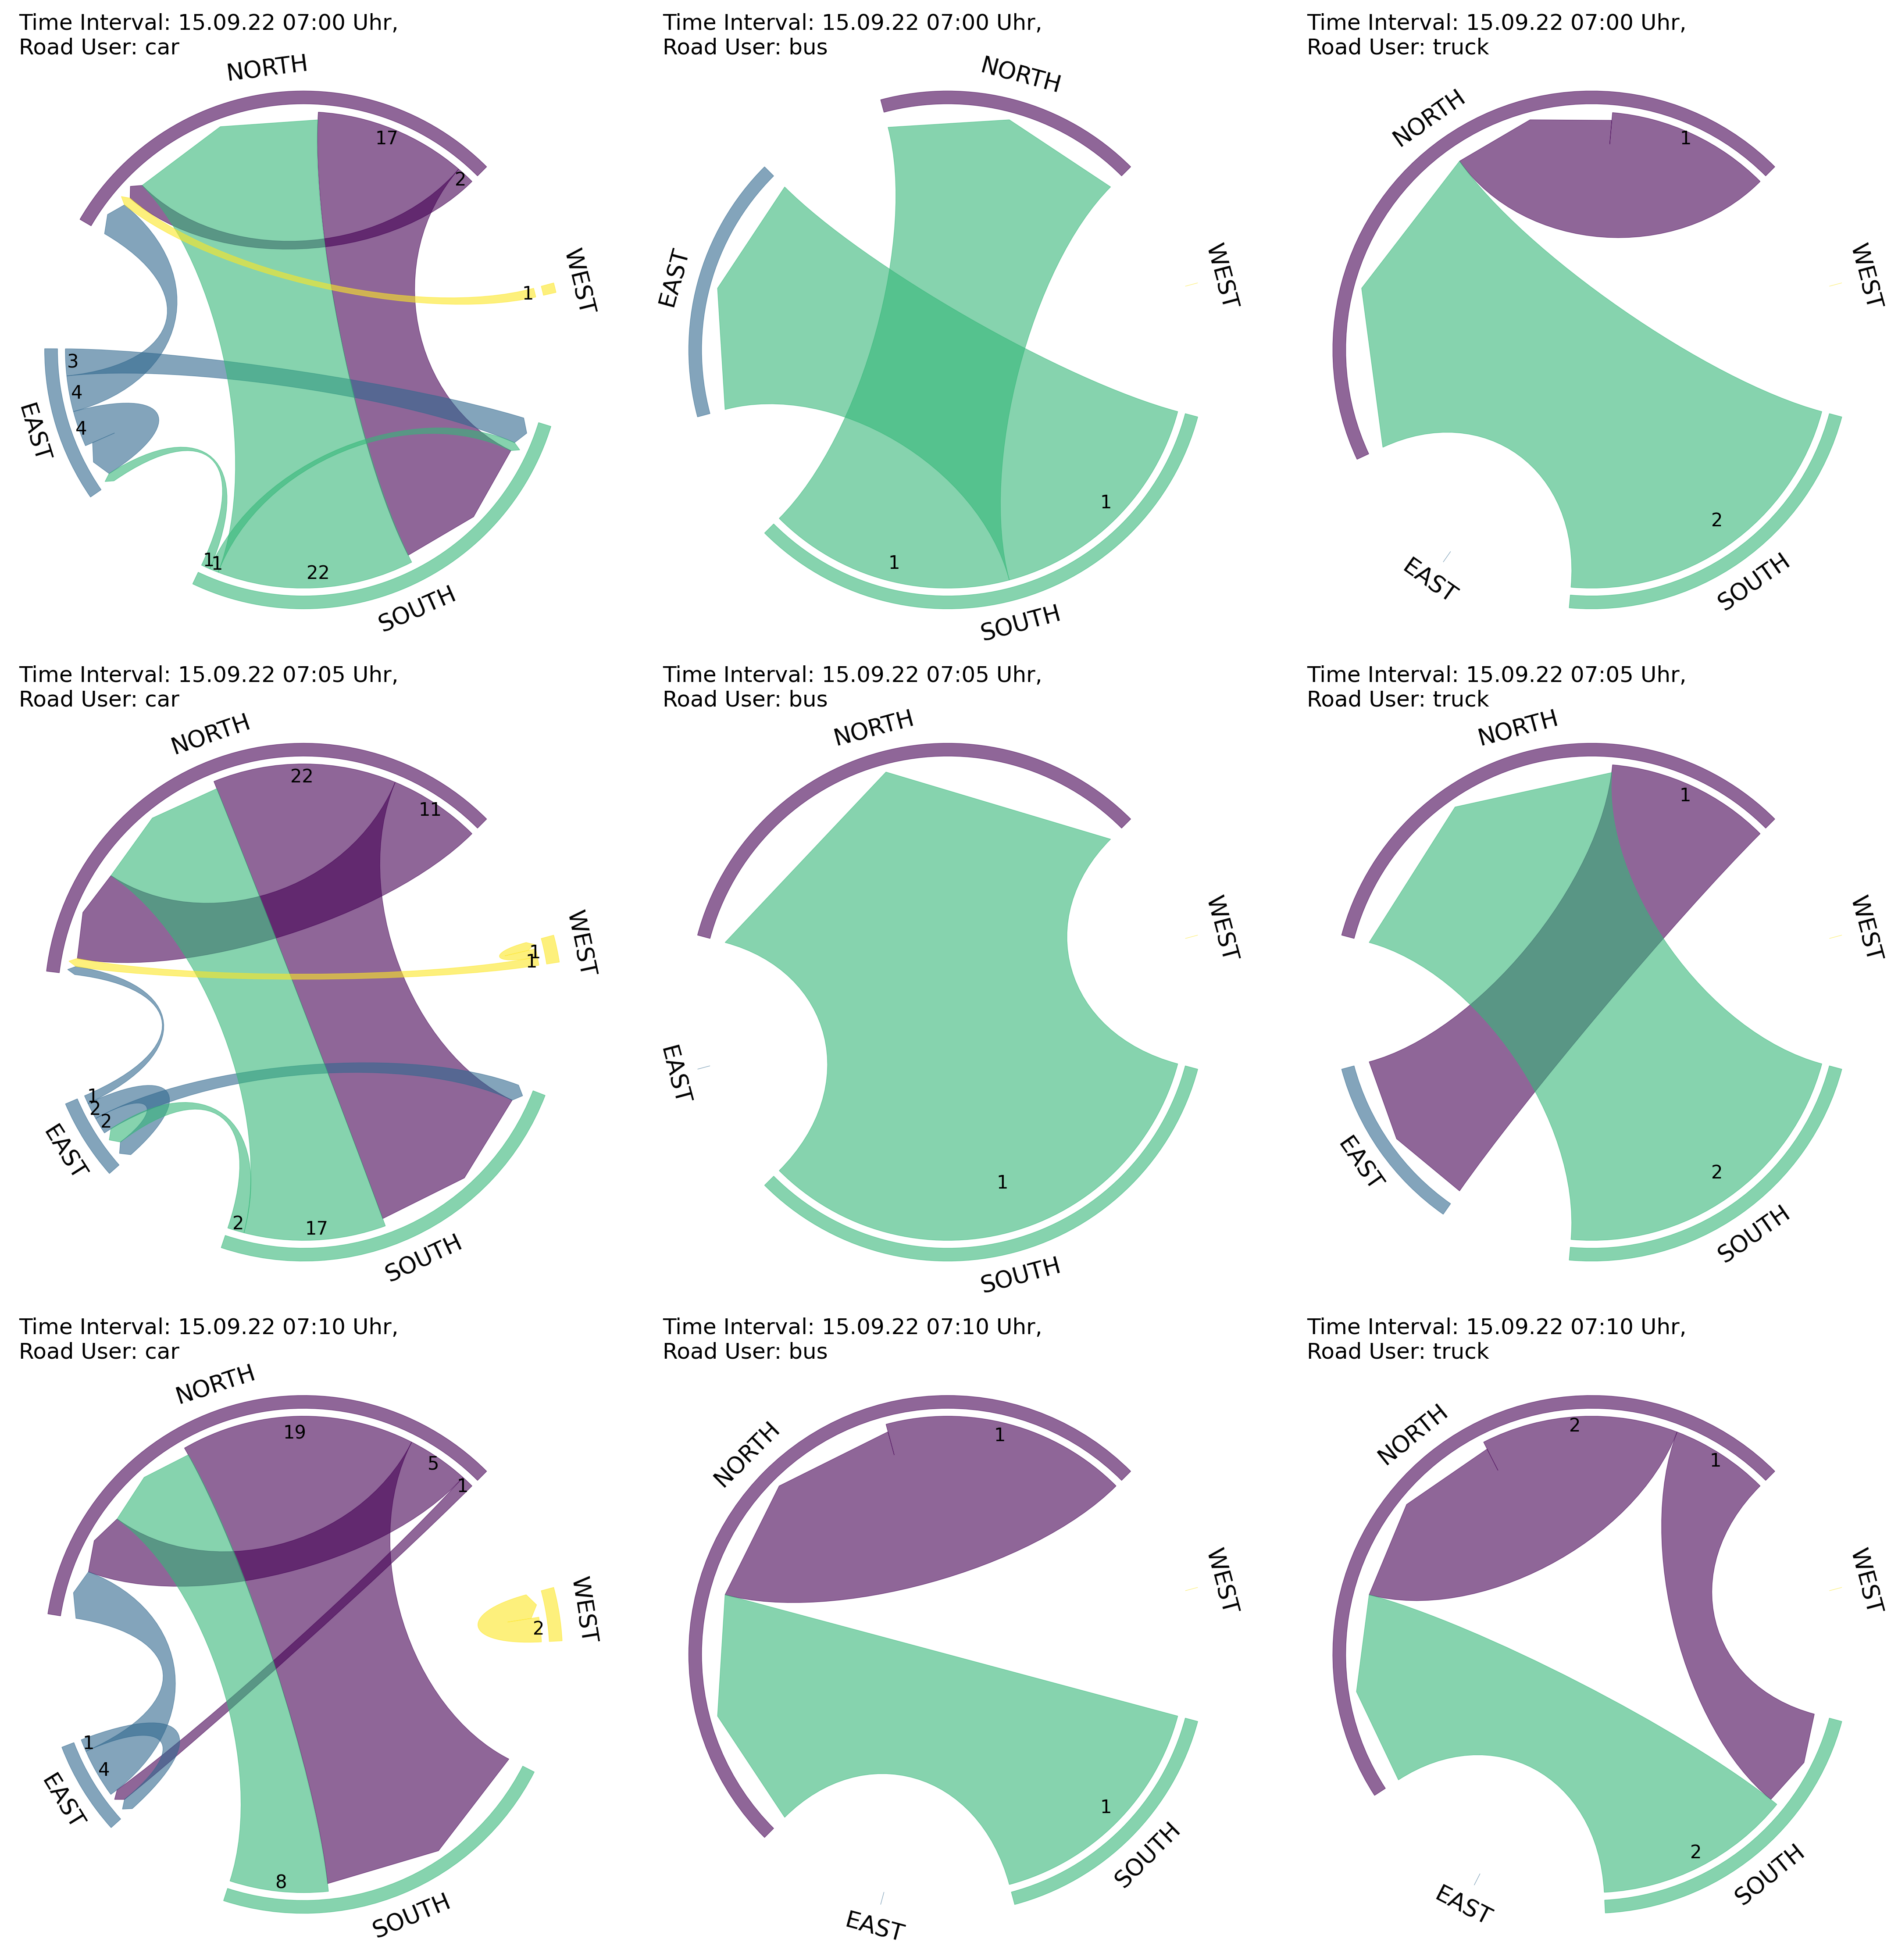

In [5]:
counts_processor = CountsProcessor(CONFIG, events)
flow_table = counts_processor.create_flow_table()
counts_processor.plot_flows()

## Berechne Zeitbedarfswerte

In [6]:
zb_calculator = ZeitbedarfsProcessor(CONFIG, events)
events_zb = zb_calculator.calculate_zbw(max_zb_value=5)
zb_calculator.plot_zb(color="time_interval", facet_col="section_id")

## Calculate Speeds

In [28]:
speed_calculator = SpeedProcessor(CONFIG, events)
speed_table = speed_calculator.calculate_speeds()
speed_calculator.plot_v_hist(row="road_user_type", section_name ="Test section")
speed_calculator.plot_q_v(section_name ="Test section")

/Users/michaelheilig/GIT/OTC/OTAnalytics/OTAnalytics/plugin_prototypes/speed_calculator/speed_calculator.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/michaelheilig/GIT/OTC/OTAnalytics/OTAnalytics/plugin_prototypes/speed_calculator/speed_calculator.py:80: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

